In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ARdf = pd.read_json("Datasets/DatabaseBest.json")
SEPdf = pd.read_json("Datasets/CleanedSEPs.json")

Turning dates strings to timestamps

In [3]:
ARdf['TIMETAG'] = pd.to_datetime(ARdf.TIMETAG)
SEPdf['TIMETAG'] = pd.to_datetime(SEPdf.TIMETAG)

Keeping only their respective date components

In [4]:
ARdf['TIMETAG'] = ARdf['TIMETAG'].dt.date
SEPdf['TIMETAG'] = SEPdf['TIMETAG'].dt.date

In [5]:
SEPDatabase = ARdf.merge(SEPdf, on=['ARNUMBER', 'TIMETAG']).reset_index(drop=True)

We begin producing plots below.

## Solar Cycles

First, we observe that we have some emptry entries on our 'MAGTYPE' column of our Active Region data frame (ARdf). We will not need these, so we drop them with the next line.

In [6]:
ARdf.MAGTYPE.unique()

array(['ALPHA', 'BETA', 'BETA-GAMMA-DELTA', 'BETA-GAMMA', 'BETA-DELTA',
       'GAMMA-DELTA', 'DELTA', 'GAMMA', ''], dtype=object)

In [7]:
ARdf = ARdf.drop(ARdf.loc[ARdf['MAGTYPE']==''].index).reset_index(drop=True) # .drop() requires a list of indices

I specify the order I want for my hue on the legend.

In [8]:
HueOrd = ['$\\alpha$', '$\\beta$', '$\\gamma \\delta$', '$\\beta \\gamma$', '$\\beta \\delta$',
          '$\\beta \\gamma \\delta$', '$\\gamma$', '$\\delta$' ] 

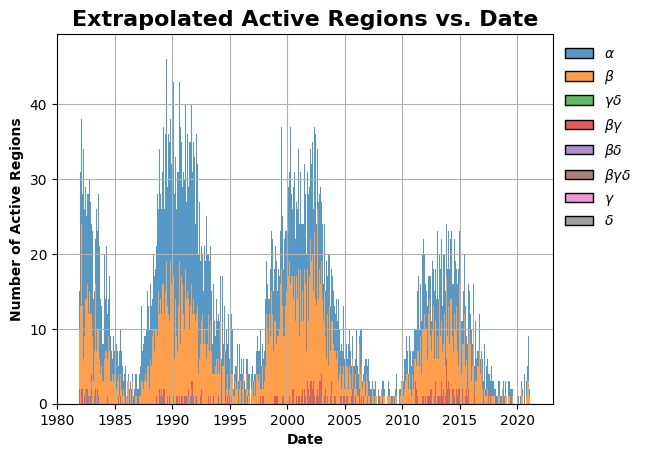

In [9]:
#plt.figure(figsize=(8,5), dpi=120)
ax = sns.histplot(data=ARdf,  x='TIMETAG', bins = 50, hue="HALE", multiple='stack',hue_order= HueOrd)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
plt.xlabel("Date", weight='bold')
plt.ylabel("Number of Active Regions", weight='bold')
plt.title("Extrapolated Active Regions vs. Date", fontsize=16, weight='bold')
plt.grid(True)
plt.show()
#plt.savefig("ExtARs.eps")

In [ ]:
ARdfNOAA = ARdf.loc[ARdf['REAL(0)/PRED(1)'] == 0 ] # Selecting non-extrapolated entries

In [ ]:
#plt.figure(figsize=(8,5), dpi=120)
ax2 = sns.histplot(data=ARdfNOAA,  x='TIMETAG', bins = 50, hue="HALE", multiple='stack',hue_order= HueOrd, \
                   legend=False)
plt.xlabel("Date", weight='bold')
plt.ylabel("Number of Active Regions", weight='bold')
plt.title("Active Regions vs. Date", fontsize=16, weight='bold')
plt.grid(True)
#plt.savefig("ARsvsDate.eps")

## Percentage of SEP events per Hale Class of an Active Region

In [10]:
CountsMagType = ( SEPDatabase['HALE'].value_counts() / len(SEPDatabase) ) *100

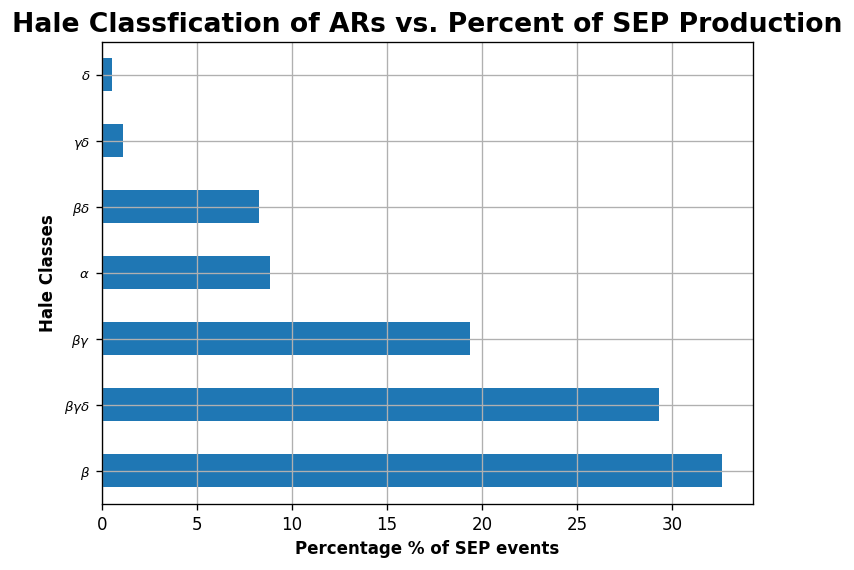

In [11]:
plt.figure(figsize=(7,5),dpi=120)
CountsMagType.plot(kind="barh")
plt.xlabel("Percentage % of SEP events", weight='bold')
plt.ylabel("Hale Classes",  weight='bold')
plt.title("Hale Classfication of ARs vs. Percent of SEP Production",  weight='bold', fontsize=16 )
plt.yticks(fontsize=8)
plt.grid(True)